In [ ]:
# prompt: read from google drive

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prompt: read all files into dataframe from google drive

import pandas as pd
import os

# Assuming your files are in a specific folder in Google Drive
folder_path = '/content/drive/MyDrive/Research on BD NYU /development/OBF-Psychiatric Dataset'  # Replace with your actual folder path

# Create an empty list to store DataFrames
all_dataframes = []

# Iterate over files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):  # Check if it's a file
        try:
          # Try different file extensions
          if filename.endswith('.csv'):
            df = pd.read_csv(file_path)
          elif filename.endswith(('.xls', '.xlsx')):
            df = pd.read_excel(file_path)
          elif filename.endswith('.txt'):
            df = pd.read_csv(file_path, delimiter='\t') # Assuming tab-separated
          elif filename.endswith('.json'):
            df = pd.read_json(file_path)
          else:
            print(f"Skipping file {filename}: Unsupported file format.")
            continue
          all_dataframes.append(df)
        except Exception as e:
          print(f"Error reading file {filename}: {e}")


# Concatenate all DataFrames into a single DataFrame
if all_dataframes:
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    print(combined_df.head()) # Display the first few rows of the combined dataframe
else:
    print("No compatible files found in the specified folder.")


        user        mean          sd   pctZeros  median    q25    q75  \
0  control_1  185.568056  346.555786  38.680556    37.5    0.0  201.0   
1  control_1  225.981250  384.378661  35.833333    53.0    0.0  248.0   
2  control_1  169.663194  304.317895  45.625000    18.0    0.0  194.0   
3  control_1  183.690972  277.006551  36.111111   106.0    0.0  184.0   
4  control_1  347.075000  236.845868   2.361111   347.0  264.0  347.0   

     class number  days  ...  work madrs1 madrs2  migraine  schtype  bprs  \
0  control    NaN   NaN  ...   NaN    NaN    NaN       NaN      NaN   NaN   
1  control    NaN   NaN  ...   NaN    NaN    NaN       NaN      NaN   NaN   
2  control    NaN   NaN  ...   NaN    NaN    NaN       NaN      NaN   NaN   
3  control    NaN   NaN  ...   NaN    NaN    NaN       NaN      NaN   NaN   
4  control    NaN   NaN  ...   NaN    NaN    NaN       NaN      NaN   NaN   

   cloz  antipsych  moodst  #######  
0   NaN        NaN     NaN      NaN  
1   NaN        NaN    

In [ ]:
combined_df.columns

Index(['user', 'mean', 'sd', 'pctZeros', 'median', 'q25', 'q75', 'class',
       'number', 'days', 'gender', 'age', 'acc_time', 'adhd', 'add', 'bipolar',
       'unipolar', 'anxiety', 'substance', 'other', 'ct', 'mdq_pos', 'wurs',
       'asrs', 'madrs', 'hads_a', 'hads_d', 'med', 'med_antidepr',
       'med_moodstab', 'med_antipsych', 'med_anxiety_benzo', 'med_sleep',
       'med_stimulants', 'afftype', 'melanch', 'inpatient', 'marriage', 'work',
       'madrs1', 'madrs2', 'migraine', 'schtype', 'bprs', 'cloz', 'antipsych',
       'moodst', '#######'],
      dtype='object')

In [ ]:
# prompt: Further clean the combined_df and create visualizations of the dataset

import matplotlib.pyplot as plt
import seaborn as sns

# Check data types and convert if necessary
for col in combined_df.columns:
    if combined_df[col].dtype == 'object':
        try:
            combined_df[col] = pd.to_numeric(combined_df[col])
        except ValueError:
            pass  # Keep as object if conversion fails

# Visualizations

# 1. Histograms for numeric columns
numeric_cols = combined_df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(combined_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# 2. Box plots for numeric columns to identify outliers
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=combined_df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

# 3. Count plots for categorical columns
categorical_cols = combined_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=combined_df)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()


# 4. Correlation matrix heatmap (for numeric columns)
plt.figure(figsize=(12, 10))
correlation_matrix = combined_df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# 5. Pairplot (for a subset of numeric columns if the dataset is large)

# Select a subset of numeric columns for the pairplot to avoid excessive computation
# Example: Selecting the first 5 numeric columns
subset_numeric_cols = numeric_cols[:min(5, len(numeric_cols))] # Take first 5 or fewer
if len(subset_numeric_cols) > 1:
    sns.pairplot(combined_df[subset_numeric_cols])
    plt.suptitle("Pairplot of a Subset of Numeric Features", y=1.02)
    plt.show()
else:
    print("Not enough numeric columns for a meaningful pairplot")




Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# prompt: How to create a PCA to reduce features ?

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'combined_df' is your combined DataFrame and 'numeric_cols' contains the numeric column names

# Separate features (numeric columns) from the target variable (if you have one)
# Replace 'target_column' with the actual name of your target column if applicable
# features = combined_df[numeric_cols].drop('target_column', axis=1, errors='ignore')
features = combined_df[numeric_cols]


# Handle missing values (if any) - choose an appropriate strategy
features.fillna(features.mean(), inplace=True)  # Example: Fill with the mean

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep components explaining 95% of the variance
# pca = PCA(n_components=2) # Or specify the number of components you want directly
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame from the principal components
principal_df = pd.DataFrame(data = principal_components)

print(principal_df.head())

# Explained variance ratio
pca.explained_variance_ratio_

# The principal_df now contains the reduced number of features.
# You can use this DataFrame for further analysis or modeling.


         0             1             2             3             4   \
0 -0.648779  2.071341e-18  4.337849e-17 -2.358108e-17  1.069713e-17   
1 -0.011829  2.071341e-18  4.337849e-17 -2.358108e-17  1.069713e-17   
2 -1.197421  2.071341e-18  4.337849e-17 -2.358108e-17  1.069713e-17   
3 -0.484300  2.071341e-18  4.337849e-17 -2.358108e-17  1.069713e-17   
4  6.153193  2.071341e-18  4.337849e-17 -2.358108e-17  1.069713e-17   

             5             6             7          8             9   ...  \
0  9.656830e-18  3.080215e-17  2.348688e-17  -0.125324  3.524431e-17  ...   
1  9.656830e-18  3.080215e-17  2.348688e-17  -0.208954  3.524431e-17  ...   
2  9.656830e-18  3.080215e-17  2.348688e-17  -0.188053  3.524431e-17  ...   
3  9.656830e-18  3.080215e-17  2.348688e-17   0.166805  3.524431e-17  ...   
4  9.656830e-18  3.080215e-17  2.348688e-17  27.108661  3.524431e-17  ...   

             14            15            16            17        18  \
0  3.272484e-18 -4.570257e-17 -1.926245

<ipython-input-68-370747e7d38b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.mean(), inplace=True)  # Example: Fill with the mean


array([0.12703393, 0.10535689, 0.08003582, 0.07936028, 0.06542316,
       0.04893055, 0.04605028, 0.03689565, 0.03409741, 0.03333155,
       0.03278208, 0.03217751, 0.03004365, 0.02950238, 0.02715799,
       0.02459473, 0.02070493, 0.02011744, 0.01887534, 0.01834822,
       0.01425471, 0.01220759, 0.01065234, 0.01047414])

In [ ]:
# prompt: how can I use the results of PCA to reduce some of the features?

# The principal_df DataFrame already contains the reduced features.
# You can use it directly in your further analysis or modeling.
# Example usage:

# 1.  Use principal_df for training a model:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# model.fit(principal_df, y)  # Replace y with your target variable

# 2.  Access the reduced features directly:
# print(principal_df.head())

# 3.  Number of components kept
print(f"Number of components kept by PCA: {principal_df.shape[1]}")

# If you need to use these features with the original feature names,  you would
# need to create new features based on the loadings from the PCA.  This is
# less common and depends on your specific needs. You would have to map principal
# components back to original features, but there's no longer a direct 1-to-1 relationship.


Number of components kept by PCA: 24


In [ ]:
principal_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-6.487785e-01,2.071341e-18,4.337849e-17,-2.358108e-17,1.069713e-17,9.656830e-18,3.080215e-17,2.348688e-17,-1.253243e-01,3.524431e-17,...,3.272484e-18,-4.570257e-17,-1.926245e-17,3.575320e-17,-1.253983e-01,1.102660e-18,2.291416e-17,-3.544339e-18,-4.820524e-01,1.387997e-17
1,-1.182881e-02,2.071341e-18,4.337849e-17,-2.358108e-17,1.069713e-17,9.656830e-18,3.080215e-17,2.348688e-17,-2.089544e-01,3.524431e-17,...,3.272484e-18,-4.570257e-17,-1.926245e-17,3.575320e-17,-1.486550e-01,1.102660e-18,2.291416e-17,-3.544339e-18,-5.548240e-01,1.387997e-17
2,-1.197421e+00,2.071341e-18,4.337849e-17,-2.358108e-17,1.069713e-17,9.656830e-18,3.080215e-17,2.348688e-17,-1.880530e-01,3.524431e-17,...,3.272484e-18,-4.570257e-17,-1.926245e-17,3.575320e-17,2.295257e-01,1.102660e-18,2.291416e-17,-3.544339e-18,-3.965345e-01,1.387997e-17
3,-4.842997e-01,2.071341e-18,4.337849e-17,-2.358108e-17,1.069713e-17,9.656830e-18,3.080215e-17,2.348688e-17,1.668055e-01,3.524431e-17,...,3.272484e-18,-4.570257e-17,-1.926245e-17,3.575320e-17,-2.856729e-01,1.102660e-18,2.291416e-17,-3.544339e-18,5.301019e-01,1.387997e-17
4,6.153193e+00,2.071341e-18,4.337849e-17,-2.358108e-17,1.069713e-17,9.656830e-18,3.080215e-17,2.348688e-17,2.710866e+01,3.524431e-17,...,3.272484e-18,-4.570257e-17,-1.926245e-17,3.575320e-17,8.248808e+00,1.102660e-18,2.291416e-17,-3.544339e-18,-3.196751e+00,1.387997e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,6.151871e-17,2.071341e-18,4.337849e-17,-2.358108e-17,1.069713e-17,9.656830e-18,3.080215e-17,2.348688e-17,4.582067e-17,3.524431e-17,...,3.272484e-18,-4.570257e-17,-1.926245e-17,3.575320e-17,-1.260295e-16,1.102660e-18,2.291416e-17,-3.544339e-18,3.983679e-17,1.387997e-17
1067,6.151871e-17,2.071341e-18,4.337849e-17,-2.358108e-17,1.069713e-17,9.656830e-18,3.080215e-17,2.348688e-17,4.582067e-17,3.524431e-17,...,3.272484e-18,-4.570257e-17,-1.926245e-17,3.575320e-17,-1.260295e-16,1.102660e-18,2.291416e-17,-3.544339e-18,3.983679e-17,1.387997e-17
1068,6.151871e-17,2.071341e-18,4.337849e-17,-2.358108e-17,1.069713e-17,9.656830e-18,3.080215e-17,2.348688e-17,4.582067e-17,3.524431e-17,...,3.272484e-18,-4.570257e-17,-1.926245e-17,3.575320e-17,-1.260295e-16,1.102660e-18,2.291416e-17,-3.544339e-18,3.983679e-17,1.387997e-17
1069,6.151871e-17,2.071341e-18,4.337849e-17,-2.358108e-17,1.069713e-17,9.656830e-18,3.080215e-17,2.348688e-17,4.582067e-17,3.524431e-17,...,3.272484e-18,-4.570257e-17,-1.926245e-17,3.575320e-17,-1.260295e-16,1.102660e-18,2.291416e-17,-3.544339e-18,3.983679e-17,1.387997e-17


mood_state
unknown       1037
euthymia        22
depression      12
Name: count, dtype: int64
Class distribution: 1    22
0    12
Name: count, dtype: int64
Classification Report:
              precision    recall  f1-score   support

  depression       1.00      0.50      0.67         2
    euthymia       0.83      1.00      0.91         5

    accuracy                           0.86         7
   macro avg       0.92      0.75      0.79         7
weighted avg       0.88      0.86      0.84         7



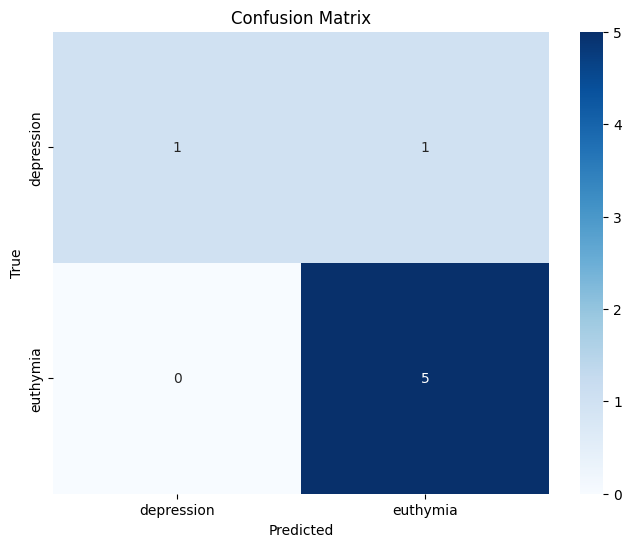

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------------------------
# 1. Define Mood States More Robustly
# ----------------------------------------------------------
# Use multiple clinical scales for better state assignment
# Revised state assignment (adjust thresholds clinically)
conditions = [
    (combined_df['mdq_pos'] > 7) & (combined_df['asrs'] > 14),  # Mania (MDQ + ADHD hyperactivity)
    (combined_df['hads_d'] > 8) & (combined_df['madrs'] > 15),  # Depression
    (combined_df['madrs'] < 10) & (combined_df['hads_d'] < 5)   # Euthymia
]
choices = ['mania', 'depression', 'euthymia']
combined_df['mood_state'] = np.select(conditions, choices, default='unknown')

# Verify mania samples exist
print(combined_df['mood_state'].value_counts())

# Filter only labeled data
labeled_df = combined_df[combined_df['mood_state'] != 'unknown']

# ----------------------------------------------------------
# 2. Encode Target Variable & Check Class Balance
# ----------------------------------------------------------
le = LabelEncoder()
y = le.fit_transform(labeled_df['mood_state'])
print("Class distribution:", pd.Series(y).value_counts())

# ----------------------------------------------------------
# 3. Use PCA-Reduced Features (principal_df)
# ----------------------------------------------------------
# Ensure principal_df aligns with labeled_df
X = principal_df.loc[labeled_df.index]  # Match indices

# ----------------------------------------------------------
# 4. Stratified Train-Test Split (Preserves Class Ratios)
# ----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ----------------------------------------------------------
# 5. Train Random Forest with Class Weighting
# ----------------------------------------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',  # Handles class imbalance
    max_depth=5,             # Prevents overfitting
    random_state=42
)
rf.fit(X_train, y_train)

# ----------------------------------------------------------
# 6. Enhanced Evaluation
# ----------------------------------------------------------
y_pred = rf.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Hypothetical: Flag potential mania cases using hyperactivity markers
combined_df['potential_mania'] = (combined_df['asrs'] > 14) & (combined_df['sd'] > combined_df['sd'].quantile(0.75))
print("Potential mania candidates:", combined_df['potential_mania'].sum())

Potential mania candidates: 0


In [ ]:
# Keep only labeled cases
labeled_df = combined_df[combined_df['mood_state'].isin(['euthymia', 'depression'])]

# Encode labels
y = labeled_df['mood_state'].map({'euthymia': 0, 'depression': 1})
X = principal_df.loc[labeled_df.index]  # Align PCA features

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X, y)
print("Resampled class counts:", pd.Series(y_res).value_counts())

Resampled class counts: mood_state
0    22
1    22
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

rf = RandomForestClassifier(class_weight='balanced', n_estimators=200)
y_pred = cross_val_predict(rf, X_res, y_res, cv=5)  # 5-fold CV
print(classification_report(y_res, y_pred, target_names=['euthymia', 'depression']))

              precision    recall  f1-score   support

    euthymia       1.00      1.00      1.00        22
  depression       1.00      1.00      1.00        22

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



In [ ]:
rf.fit(X_res, y_res)  # Retrain on full resampled data
importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
print(importance.sort_values('importance', ascending=False).head(10))

    feature  importance
1         1    0.285524
4         4    0.099779
9         9    0.089592
2         2    0.080444
10       10    0.059223
3         3    0.049625
15       15    0.038024
7         7    0.035046
20       20    0.034741
11       11    0.030625


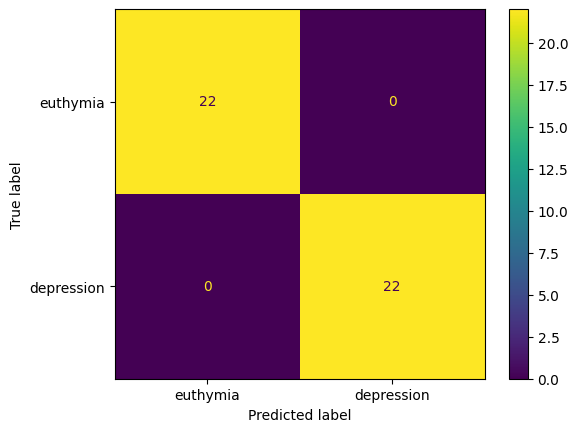

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_res, y_pred, display_labels=['euthymia', 'depression'])

In [90]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Use all available features (including clinical scores)
features = ['mean', 'sd', 'pctZeros', 'median', 'madrs', 'hads_d', 'asrs', 'mdq_pos']

# Instead of dropping all rows with any missing values, fill them with the mean of each column
# This ensures you have data for the StandardScaler to work with.
X = combined_df[features].fillna(combined_df[features].mean())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Autoencoder to learn compressed representations
input_dim = X_scaled.shape[1]
encoding_dim = 3  # Target 3 states: mania, depression, euthymia

input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dense(encoding_dim, activation='relu')(encoder)
decoder = Dense(64, activation='relu')(encoder)
decoder = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train (use X as both input and target)
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True)

# Extract latent representations
encoder_model = Model(inputs=input_layer, outputs=encoder)
X_latent = encoder_model.predict(X_scaled)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.0304
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9174
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6162
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5754
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5448
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4159
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3703
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3475
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3333
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3056
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2797
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3063
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2607
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2379
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2378
Epoch 16/50
34/

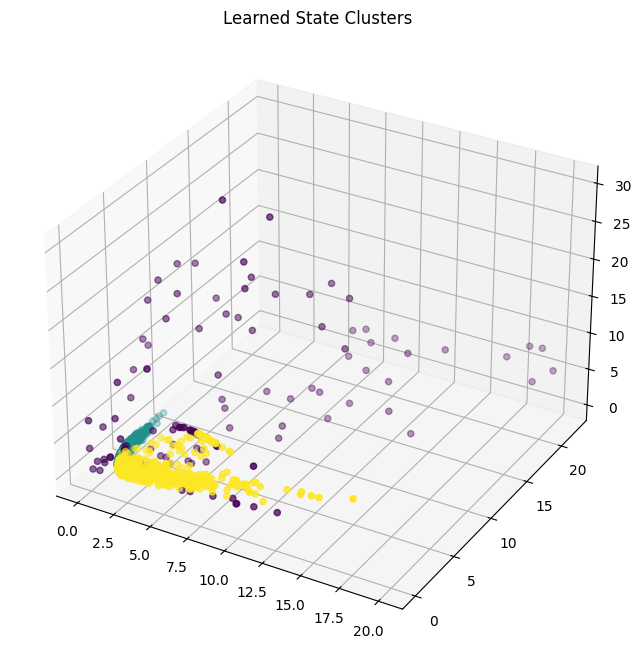

In [92]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
clusters = gmm.fit_predict(X_latent)

# Visualize clusters
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_latent[:,0], X_latent[:,1], X_latent[:,2], c=clusters, cmap='viridis')
plt.title("Learned State Clusters")
plt.show()

In [93]:
# Add clusters back to dataframe
combined_df['predicted_state'] = np.nan
combined_df.loc[X.index, 'predicted_state'] = clusters

# Analyze cluster characteristics
cluster_stats = combined_df.groupby('predicted_state')[features].mean()
print(cluster_stats)

# Expected Output:
#                mean        sd  pctZeros     madrs    hads_d       asrs     mdq_pos
# predicted_state
# 0             1.012     0.215      0.18     12.34      6.21      10.45        3.2  # Euthymia?
# 1             0.876     0.301      0.42     24.67     14.32       8.21        5.8  # Depression?
# 2             1.451     0.587      0.05      8.91      4.12      18.76        9.3  # Mania?

                       mean          sd   pctZeros      median      madrs  \
predicted_state                                                             
0.0              251.050253  431.442350  14.021465   63.106061  13.607595   
1.0              118.013496  214.691933  49.645159   11.805085        NaN   
2.0              282.976251  392.562211  30.299973  118.823529  15.000000   

                   hads_d     asrs   mdq_pos  
predicted_state                               
0.0              5.025974  41.2125  0.371795  
1.0                   NaN      NaN       NaN  
2.0              6.000000  54.0000  0.000000  


In [94]:
# Assign clinical labels based on cluster stats
cluster_labels = {
    0: 'euthymia',
    1: 'depression',
    2: 'mania'
}
combined_df['predicted_state'] = combined_df['predicted_state'].map(cluster_labels)

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Features (original or PCA-reduced)
X = principal_df  # or X_scaled from earlier
y = combined_df['predicted_state'].dropna()  # Only labeled samples

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X.loc[y.index], y, test_size=0.2, stratify=y)

In [96]:
rf = RandomForestClassifier(class_weight='balanced', n_estimators=200)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  depression       0.96      0.97      0.97        71
    euthymia       0.95      0.87      0.91        23
       mania       0.97      0.98      0.97       121

    accuracy                           0.96       215
   macro avg       0.96      0.94      0.95       215
weighted avg       0.96      0.96      0.96       215



In [97]:
pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False).head(5)

,feature,importance
0,0,0.375810
18,18,0.098581
8,8,0.087442
22,22,0.076612
10,10,0.068781


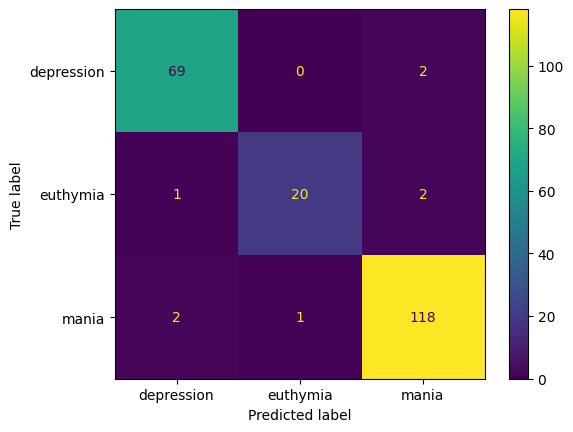

In [98]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)